# Building a Regression MLP Using the Sequential API
Let’s switch to the California housing problem and tackle it using a
regression neural network.   
After loading the data, we split it into a training set, a
validation set, and a test set, and we scale all the features:

In [11]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(
housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(
X_train_full, y_train_full)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [3]:
model = keras.models.Sequential([
keras.layers.Dense(30, activation="relu",
input_shape=X_train.shape[1:]),
keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer="sgd")
history = model.fit(X_train, y_train, epochs=20,
validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3] # pretend these are new instances
y_pred = model.predict(X_new)

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 1s 63us/sample - loss: 0.9155 - val_loss: 1.4037
Epoch 2/20
11610/11610 [==============================] - 0s 38us/sample - loss: 0.6986 - val_loss: 0.4952
Epoch 3/20
11610/11610 [==============================] - 0s 38us/sample - loss: 0.4925 - val_loss: 0.4442
Epoch 4/20
11610/11610 [==============================] - 0s 36us/sample - loss: 0.4689 - val_loss: 0.4296
Epoch 5/20
11610/11610 [==============================] - 0s 37us/sample - loss: 0.4587 - val_loss: 0.4873
Epoch 6/20
11610/11610 [==============================] - 0s 42us/sample - loss: 0.4517 - val_loss: 0.4203
Epoch 7/20
11610/11610 [==============================] - 0s 36us/sample - loss: 0.4407 - val_loss: 0.4117
Epoch 8/20
11610/11610 [==============================] - 0s 35us/sample - loss: 0.4351 - val_loss: 0.4112
Epoch 9/20
11610/11610 [==============================] - 0s 36us/sample - loss: 0.4293 - val_l

As you can see, the Sequential API is quite easy to use. However, although
Sequential models are extremely common, it is sometimes useful to
build neural networks with more complex topologies, or with multiple
inputs or outputs. For this purpose, Keras offers the Functional API.


# Building Complex Models Using the Functional API
One example of a nonsequential neural network is a Wide & Deep neural
network. This neural network architecture was introduced in a 2016 paper
by Heng-Tze Cheng et al. It connects all or part of the inputs directly to
the output layer,

In [4]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.Concatenate()([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs=[input_], outputs=[output])

Let’s go through each line of this code:
* First, we need to create an Input object. This is a specification
of the kind of input the model will get, including its shape and
dtype. A model may actually have multiple inputs, as we will see
shortly.
* Next, we create a Dense layer with 30 neurons, using the ReLU
activation function. As soon as it is created, notice that we call it
like a function, passing it the input. This is why this is called the
Functional API. Note that we are just telling Keras how it should
connect the layers together; no actual data is being processed yet.
* We then create a second hidden layer, and again we use it as a
function. Note that we pass it the output of the first hidden layer.
* Next, we create a Concatenate layer, and once again we
immediately use it like a function, to concatenate the input and
the output of the second hidden layer. You may prefer the
keras.layers.concatenate() function, which creates a
Concatenate layer and immediately calls it with the given inputs.
* Then we create the output layer, with a single neuron and no
activation function, and we call it like a function, passing it the
result of the concatenation.

Lastly, we create a Keras Model, specifying which inputs and
outputs to use.  
If you want to send a subset of the features through the wide path
and a different subset (possibly overlapping) through the deep path? In this case, one solution is to use multiple inputs. For
example, suppose we want to send five features through the wide path
(features 0 to 4), and six features through the deep path (features 2 to 7)


In [5]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
model = keras.Model(inputs=[input_A, input_B], outputs=[output])

In [6]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))
X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]
history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
validation_data=((X_valid_A, X_valid_B), y_valid))
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))


Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 1s 68us/sample - loss: 2.3705 - val_loss: 1.0433
Epoch 2/20
11610/11610 [==============================] - 0s 40us/sample - loss: 0.9506 - val_loss: 0.7838
Epoch 3/20
11610/11610 [==============================] - 0s 38us/sample - loss: 0.7966 - val_loss: 0.6965
Epoch 4/20
11610/11610 [==============================] - 0s 42us/sample - loss: 0.7290 - val_loss: 0.6473
Epoch 5/20
11610/11610 [==============================] - 0s 40us/sample - loss: 0.6868 - val_loss: 0.6132
Epoch 6/20
11610/11610 [==============================] - 0s 42us/sample - loss: 0.6558 - val_loss: 0.5892
Epoch 7/20
11610/11610 [==============================] - 1s 46us/sample - loss: 0.6318 - val_loss: 0.5684
Epoch 8/20
11610/11610 [==============================] - 1s 44us/sample - loss: 0.6120 - val_loss: 0.5537
Epoch 9/20
11610/11610 [==============================] - 1s 57us/sample - loss: 0.5954 - val_l

For this model we want to have multiple outputs

In [7]:
output = keras.layers.Dense(1, name="main_output")(concat)
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)
model = keras.Model(inputs=[input_A, input_B], outputs=[output,
aux_output])

Each output will need its own loss function. Therefore, when we compile
the model, we should pass a list of losses

In [8]:
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1],
optimizer="sgd")

In [9]:
history = model.fit(
[X_train_A, X_train_B], [y_train, y_train], epochs=20,
validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))


Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 1s 100us/sample - loss: 0.8309 - main_output_loss: 0.7427 - aux_output_loss: 1.6220 - val_loss: 0.5255 - val_main_output_loss: 0.4762 - val_aux_output_loss: 0.9686
Epoch 2/20
11610/11610 [==============================] - 1s 47us/sample - loss: 0.5842 - main_output_loss: 0.5432 - aux_output_loss: 0.9522 - val_loss: 0.4944 - val_main_output_loss: 0.4513 - val_aux_output_loss: 0.8817
Epoch 3/20
11610/11610 [==============================] - 1s 47us/sample - loss: 0.5264 - main_output_loss: 0.4915 - aux_output_loss: 0.8388 - val_loss: 0.4703 - val_main_output_loss: 0.4364 - val_aux_output_loss: 0.7745
Epoch 4/20
11610/11610 [==============================] - 1s 47us/sample - loss: 0.4927 - main_output_loss: 0.4628 - aux_output_loss: 0.7608 - val_loss: 0.4535 - val_main_output_loss: 0.4255 - val_aux_output_loss: 0.7053
Epoch 5/20
11610/11610 [==============================] - 1s 46us/

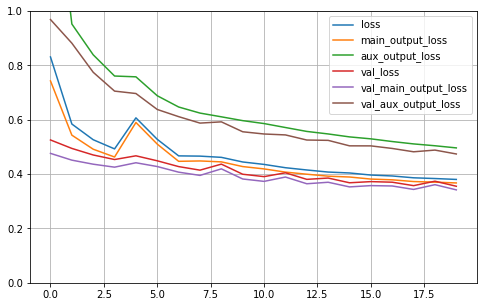

In [12]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [13]:
total_loss, main_loss, aux_loss = model.evaluate(
[X_test_A, X_test_B], [y_test, y_test])

5160/5160 [==============================] - 0s 26us/sample - loss: 0.3582 - main_output_loss: 0.3440 - aux_output_loss: 0.4765


In [14]:
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])

---
# Using the Subclassing API to Build Dynamic Models

Some models involve loops, varying shapes,
conditional branching, and other dynamic behaviors. For such cases, or
simply if you prefer a more imperative programming style, the
Subclassing API is for you.  
Simply subclass the Model class, create the layers you need in the
constructor, and use them to perform the computations you want in the
call() method.

In [15]:
class WideAndDeepModel(keras.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs) # handles standard args (e.g., name)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
        
    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output

In [16]:
model = WideAndDeepModel()

# Saving and Restoring a Mode

When using the Sequential API or the Functional API, saving a trained
Keras model is as simple as it gets:
```python
model = keras.layers.Sequential([...]) # or keras.Model([...])
model.compile([...])
model.fit([...])
model.save("my_keras_model.h5")
```
 Loading the model is just as easy:
```python
model = keras.models.load_model("my_keras_model.h5")
```

## Using Callbacks
The fit() method accepts a callbacks argument that lets you specify a
list of objects that Keras will call at the start and end of training, at the
start and end of each epoch, and even before and after processing each
batch. 
```python
[...] # build and compile the model
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5")
history = model.fit(X_train, y_train, epochs=10, callbacks=
[checkpoint_cb])

```

---
## Using TensorBoard for Visualization

In [19]:
import os
import time

root_logdir = os.path.join(os.curdir, "my_logs")
def get_run_logdir():

    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)
run_logdir = get_run_logdir() # e.g., './my_logs/run_2019_06_07-15_15_22'

In [22]:
test_logdir = get_run_logdir()
writer = tf.summary.create_file_writer(test_logdir)
with writer.as_default():
    for step in range(1, 1000 + 1):
        tf.summary.scalar("my_scalar", np.sin(step / 10), step=step)
        data = (np.random.randn(100) + 2) * step / 100 # some random data
        tf.summary.histogram("my_hist", data, buckets=50, step=step)
        images = np.random.rand(2, 32, 32, 3) # random 32×32 RGB images
        tf.summary.image("my_images", images * step / 1000, step=step)
        texts = ["The step is " + str(step), "Its square is " +
        str(step**2)]
        tf.summary.text("my_text", texts, step=step)
        sine_wave = tf.math.sin(tf.range(12000) / 48000 * 2 * np.pi *
        step)
        audio = tf.reshape(tf.cast(sine_wave, tf.float32), [1, -1, 1])
        tf.summary.audio("my_audio", audio, sample_rate=48000, step=step)

---
# Fine-Tuning Neural Network Hyperparameters

In [27]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3,
input_shape=[8]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(lr=learning_rate)
    model.compile(loss="mse", optimizer=optimizer)
    return model

In [28]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)


In [29]:
keras_reg.fit(X_train, y_train, epochs=100,
validation_data=(X_valid, y_valid),
callbacks=[keras.callbacks.EarlyStopping(patience=10)])
mse_test = keras_reg.score(X_test, y_test)
y_pred = keras_reg.predict(X_new)

Train on 11610 samples, validate on 3870 samples
Epoch 1/100
11610/11610 [==============================] - 1s 61us/sample - loss: 1.4926 - val_loss: 0.7664
Epoch 2/100
11610/11610 [==============================] - 0s 41us/sample - loss: 0.7500 - val_loss: 0.6528
Epoch 3/100
11610/11610 [==============================] - 0s 39us/sample - loss: 0.6538 - val_loss: 0.5789
Epoch 4/100
11610/11610 [==============================] - 1s 52us/sample - loss: 0.5938 - val_loss: 0.5355
Epoch 5/100
11610/11610 [==============================] - 1s 52us/sample - loss: 0.5503 - val_loss: 0.5027
Epoch 6/100
11610/11610 [==============================] - 1s 51us/sample - loss: 0.5218 - val_loss: 0.4770
Epoch 7/100
11610/11610 [==============================] - 1s 49us/sample - loss: 0.5012 - val_loss: 0.4609
Epoch 8/100
11610/11610 [==============================] - 1s 45us/sample - loss: 0.4875 - val_loss: 0.4520
Epoch 9/100
11610/11610 [==============================] - 1s 48us/sample - loss: 0.476

11610/11610 [==============================] - 0s 36us/sample - loss: 0.3757 - val_loss: 0.3568
Epoch 76/100
11610/11610 [==============================] - 0s 35us/sample - loss: 0.3741 - val_loss: 0.3586
Epoch 77/100
11610/11610 [==============================] - 0s 36us/sample - loss: 0.3730 - val_loss: 0.3582
Epoch 78/100
11610/11610 [==============================] - 0s 43us/sample - loss: 0.3743 - val_loss: 0.3574
Epoch 79/100
11610/11610 [==============================] - 0s 37us/sample - loss: 0.3718 - val_loss: 0.3568
Epoch 80/100
11610/11610 [==============================] - 0s 36us/sample - loss: 0.3740 - val_loss: 0.3546
Epoch 81/100
11610/11610 [==============================] - 0s 40us/sample - loss: 0.3714 - val_loss: 0.3569
Epoch 82/100
11610/11610 [==============================] - 0s 37us/sample - loss: 0.3709 - val_loss: 0.3542
Epoch 83/100
11610/11610 [==============================] - 0s 36us/sample - loss: 0.3700 - val_loss: 0.3541
Epoch 84/100
11610/11610 [======

In [30]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

In [31]:
param_distribs = {
    "n_hidden": [0, 1, 2, 3],
    "n_neurons": np.arange(1, 100),
    "learning_rate": reciprocal(3e-4, 3e-2),
    }
rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10,
cv=3)
rnd_search_cv.fit(X_train, y_train, epochs=100,
validation_data=(X_valid, y_valid),
callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 119us/sample - loss: 0.9094 - val_loss: 0.6116
Epoch 2/100
7740/7740 [==============================] - 0s 48us/sample - loss: 0.5545 - val_loss: 0.4858
Epoch 3/100
7740/7740 [==============================] - 0s 45us/sample - loss: 0.5100 - val_loss: 0.4544
Epoch 4/100
7740/7740 [==============================] - 0s 47us/sample - loss: 0.4851 - val_loss: 0.4423
Epoch 5/100
7740/7740 [==============================] - 0s 46us/sample - loss: 0.4798 - val_loss: 0.4959
Epoch 6/100
7740/7740 [==============================] - 0s 44us/sample - loss: 0.4690 - val_loss: 0.4353
Epoch 7/100
7740/7740 [==============================] - 0s 45us/sample - loss: 0.4515 - val_loss: 0.4299
Epoch 8/100
7740/7740 [==============================] - 0s 49us/sample - loss: 0.4465 - val_loss: 0.4251
Epoch 9/100
7740/7740 [==============================] - 0s 44us/sample - loss: 0.4381 - val_loss: 0.42

7740/7740 [==============================] - 0s 41us/sample - loss: 0.4581 - val_loss: 0.4407
Epoch 9/100
7740/7740 [==============================] - 0s 41us/sample - loss: 0.4537 - val_loss: 0.4336
Epoch 10/100
7740/7740 [==============================] - 0s 41us/sample - loss: 0.4397 - val_loss: 0.4231
Epoch 11/100
7740/7740 [==============================] - 0s 41us/sample - loss: 0.4348 - val_loss: 0.4250
Epoch 12/100
7740/7740 [==============================] - 0s 41us/sample - loss: 0.4346 - val_loss: 0.4089
Epoch 13/100
7740/7740 [==============================] - 0s 41us/sample - loss: 0.4242 - val_loss: 0.4059
Epoch 14/100
7740/7740 [==============================] - 0s 41us/sample - loss: 0.4157 - val_loss: 0.3976
Epoch 15/100
7740/7740 [==============================] - 0s 41us/sample - loss: 0.4119 - val_loss: 0.3982
Epoch 16/100
7740/7740 [==============================] - 0s 42us/sample - loss: 0.4085 - val_loss: 0.3971
Epoch 17/100
7740/7740 [===========================

7740/7740 [==============================] - 0s 54us/sample - loss: 0.3107 - val_loss: 0.3206
Epoch 85/100
7740/7740 [==============================] - 0s 55us/sample - loss: 0.3086 - val_loss: 0.3214
Epoch 86/100
7740/7740 [==============================] - 0s 51us/sample - loss: 0.3199 - val_loss: 0.3257
Epoch 87/100
7740/7740 [==============================] - 0s 50us/sample - loss: 0.3068 - val_loss: 0.3170
Epoch 88/100
7740/7740 [==============================] - 0s 44us/sample - loss: 0.3072 - val_loss: 0.3164
Epoch 89/100
7740/7740 [==============================] - 0s 43us/sample - loss: 0.3071 - val_loss: 0.3213
Epoch 90/100
7740/7740 [==============================] - 0s 42us/sample - loss: 0.3125 - val_loss: 0.3201
Epoch 91/100
7740/7740 [==============================] - 0s 42us/sample - loss: 0.3051 - val_loss: 0.3234
Epoch 92/100
7740/7740 [==============================] - 0s 42us/sample - loss: 0.3105 - val_loss: 0.3140
Epoch 93/100
7740/7740 [==========================

7740/7740 [==============================] - 0s 51us/sample - loss: 0.3373 - val_loss: 0.3381
Epoch 60/100
7740/7740 [==============================] - 0s 46us/sample - loss: 0.3364 - val_loss: 0.3371
Epoch 61/100
7740/7740 [==============================] - 0s 44us/sample - loss: 0.3319 - val_loss: 0.3379
Epoch 62/100
7740/7740 [==============================] - 0s 43us/sample - loss: 0.3304 - val_loss: 0.3349
Epoch 63/100
7740/7740 [==============================] - 0s 45us/sample - loss: 0.3296 - val_loss: 0.3327
Epoch 64/100
7740/7740 [==============================] - 0s 43us/sample - loss: 0.3291 - val_loss: 0.3343
Epoch 65/100
7740/7740 [==============================] - 0s 43us/sample - loss: 0.3278 - val_loss: 0.3314
Epoch 66/100
7740/7740 [==============================] - 0s 43us/sample - loss: 0.3274 - val_loss: 0.3333
Epoch 67/100
7740/7740 [==============================] - 0s 42us/sample - loss: 0.3257 - val_loss: 0.3307
Epoch 68/100
7740/7740 [==========================

7740/7740 [==============================] - 0s 38us/sample - loss: 0.5503 - val_loss: 0.5142
Epoch 12/100
7740/7740 [==============================] - 0s 37us/sample - loss: 0.5484 - val_loss: 0.5124
Epoch 13/100
7740/7740 [==============================] - 0s 38us/sample - loss: 0.5472 - val_loss: 0.5118
Epoch 14/100
7740/7740 [==============================] - 0s 37us/sample - loss: 0.5456 - val_loss: 0.5102
Epoch 15/100
7740/7740 [==============================] - 0s 38us/sample - loss: 0.5446 - val_loss: 0.5097
Epoch 16/100
7740/7740 [==============================] - 0s 37us/sample - loss: 0.5437 - val_loss: 0.5095
Epoch 17/100
7740/7740 [==============================] - 0s 39us/sample - loss: 0.5424 - val_loss: 0.5081
Epoch 18/100
7740/7740 [==============================] - 0s 38us/sample - loss: 0.5413 - val_loss: 0.5071
Epoch 19/100
7740/7740 [==============================] - 0s 37us/sample - loss: 0.5406 - val_loss: 0.5062
Epoch 20/100
7740/7740 [==========================

7740/7740 [==============================] - 0s 38us/sample - loss: 0.5525 - val_loss: 0.5086
Epoch 35/100
7740/7740 [==============================] - 0s 40us/sample - loss: 0.5510 - val_loss: 0.5075
Epoch 36/100
7740/7740 [==============================] - 0s 37us/sample - loss: 0.5496 - val_loss: 0.5065
Epoch 37/100
7740/7740 [==============================] - 0s 37us/sample - loss: 0.5483 - val_loss: 0.5056
Epoch 38/100
7740/7740 [==============================] - 0s 37us/sample - loss: 0.5470 - val_loss: 0.5047
Epoch 39/100
7740/7740 [==============================] - 0s 37us/sample - loss: 0.5459 - val_loss: 0.5040
Epoch 40/100
7740/7740 [==============================] - 0s 37us/sample - loss: 0.5449 - val_loss: 0.5033
Epoch 41/100
7740/7740 [==============================] - 0s 37us/sample - loss: 0.5440 - val_loss: 0.5028
Epoch 42/100
7740/7740 [==============================] - 0s 38us/sample - loss: 0.5431 - val_loss: 0.5021
Epoch 43/100
7740/7740 [==========================

7740/7740 [==============================] - 0s 42us/sample - loss: 0.5978 - val_loss: 0.5531
Epoch 29/100
7740/7740 [==============================] - 0s 43us/sample - loss: 0.5927 - val_loss: 0.5480
Epoch 30/100
7740/7740 [==============================] - 0s 42us/sample - loss: 0.5877 - val_loss: 0.5433
Epoch 31/100
7740/7740 [==============================] - 0s 43us/sample - loss: 0.5829 - val_loss: 0.5392
Epoch 32/100
7740/7740 [==============================] - 0s 45us/sample - loss: 0.5782 - val_loss: 0.5352
Epoch 33/100
7740/7740 [==============================] - 0s 42us/sample - loss: 0.5737 - val_loss: 0.5311
Epoch 34/100
7740/7740 [==============================] - 0s 42us/sample - loss: 0.5693 - val_loss: 0.5275
Epoch 35/100
7740/7740 [==============================] - 0s 43us/sample - loss: 0.5651 - val_loss: 0.5239
Epoch 36/100
7740/7740 [==============================] - 0s 43us/sample - loss: 0.5610 - val_loss: 0.5203
Epoch 37/100
7740/7740 [==========================

7740/7740 [==============================] - 0s 43us/sample - loss: 0.6769 - val_loss: 0.6384
Epoch 13/100
7740/7740 [==============================] - 0s 42us/sample - loss: 0.6657 - val_loss: 0.6283
Epoch 14/100
7740/7740 [==============================] - 0s 43us/sample - loss: 0.6554 - val_loss: 0.6180
Epoch 15/100
7740/7740 [==============================] - 0s 44us/sample - loss: 0.6456 - val_loss: 0.6081
Epoch 16/100
7740/7740 [==============================] - 0s 43us/sample - loss: 0.6366 - val_loss: 0.5999
Epoch 17/100
7740/7740 [==============================] - 0s 42us/sample - loss: 0.6278 - val_loss: 0.5921
Epoch 18/100
7740/7740 [==============================] - 0s 43us/sample - loss: 0.6197 - val_loss: 0.5836
Epoch 19/100
7740/7740 [==============================] - 0s 43us/sample - loss: 0.6121 - val_loss: 0.5761
Epoch 20/100
7740/7740 [==============================] - 0s 43us/sample - loss: 0.6047 - val_loss: 0.5695
Epoch 21/100
7740/7740 [==========================

7740/7740 [==============================] - 0s 59us/sample - loss: 0.4397 - val_loss: 0.4241
Epoch 89/100
7740/7740 [==============================] - 0s 57us/sample - loss: 0.4389 - val_loss: 0.4229
Epoch 90/100
7740/7740 [==============================] - 0s 42us/sample - loss: 0.4381 - val_loss: 0.4223
Epoch 91/100
7740/7740 [==============================] - 0s 52us/sample - loss: 0.4372 - val_loss: 0.4220
Epoch 92/100
7740/7740 [==============================] - 0s 64us/sample - loss: 0.4364 - val_loss: 0.4207
Epoch 93/100
7740/7740 [==============================] - 0s 47us/sample - loss: 0.4356 - val_loss: 0.4204
Epoch 94/100
7740/7740 [==============================] - 0s 54us/sample - loss: 0.4348 - val_loss: 0.4197
Epoch 95/100
7740/7740 [==============================] - 0s 46us/sample - loss: 0.4340 - val_loss: 0.4188
Epoch 96/100
7740/7740 [==============================] - 0s 61us/sample - loss: 0.4332 - val_loss: 0.4189
Epoch 97/100
7740/7740 [==========================

7740/7740 [==============================] - 0s 44us/sample - loss: 0.4690 - val_loss: 0.4415
Epoch 64/100
7740/7740 [==============================] - 0s 43us/sample - loss: 0.4678 - val_loss: 0.4408
Epoch 65/100
7740/7740 [==============================] - 0s 43us/sample - loss: 0.4667 - val_loss: 0.4394
Epoch 66/100
7740/7740 [==============================] - 0s 41us/sample - loss: 0.4656 - val_loss: 0.4382
Epoch 67/100
7740/7740 [==============================] - 0s 43us/sample - loss: 0.4645 - val_loss: 0.4380
Epoch 68/100
7740/7740 [==============================] - 0s 42us/sample - loss: 0.4635 - val_loss: 0.4365
Epoch 69/100
7740/7740 [==============================] - 0s 43us/sample - loss: 0.4625 - val_loss: 0.4365
Epoch 70/100
7740/7740 [==============================] - 0s 43us/sample - loss: 0.4615 - val_loss: 0.4356
Epoch 71/100
7740/7740 [==============================] - 0s 42us/sample - loss: 0.4606 - val_loss: 0.4347
Epoch 72/100
7740/7740 [==========================

7740/7740 [==============================] - 0s 39us/sample - loss: 0.4414 - val_loss: 0.4192
Epoch 18/100
7740/7740 [==============================] - 0s 39us/sample - loss: 0.4373 - val_loss: 0.4166
Epoch 19/100
7740/7740 [==============================] - 0s 39us/sample - loss: 0.4342 - val_loss: 0.4144
Epoch 20/100
7740/7740 [==============================] - 0s 39us/sample - loss: 0.4309 - val_loss: 0.4114
Epoch 21/100
7740/7740 [==============================] - 0s 40us/sample - loss: 0.4282 - val_loss: 0.4114
Epoch 22/100
7740/7740 [==============================] - 0s 41us/sample - loss: 0.4256 - val_loss: 0.4138
Epoch 23/100
7740/7740 [==============================] - 0s 40us/sample - loss: 0.4232 - val_loss: 0.4073
Epoch 24/100
7740/7740 [==============================] - 0s 39us/sample - loss: 0.4203 - val_loss: 0.4061
Epoch 25/100
7740/7740 [==============================] - 0s 40us/sample - loss: 0.4176 - val_loss: 0.4000
Epoch 26/100
7740/7740 [==========================

7740/7740 [==============================] - 0s 40us/sample - loss: 0.3483 - val_loss: 0.3491
Epoch 94/100
7740/7740 [==============================] - 0s 39us/sample - loss: 0.3471 - val_loss: 0.3474
Epoch 95/100
7740/7740 [==============================] - 0s 40us/sample - loss: 0.3477 - val_loss: 0.3472
Epoch 96/100
7740/7740 [==============================] - 0s 40us/sample - loss: 0.3472 - val_loss: 0.3464
Epoch 97/100
7740/7740 [==============================] - 0s 40us/sample - loss: 0.3464 - val_loss: 0.3459
Epoch 98/100
7740/7740 [==============================] - 0s 39us/sample - loss: 0.3472 - val_loss: 0.3460
Epoch 99/100
7740/7740 [==============================] - 0s 39us/sample - loss: 0.3457 - val_loss: 0.3462
Epoch 100/100
3870/3870 [==============================] - 0s 19us/sample - loss: 0.3801
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 79us/sample - loss: 1.2312 - val_loss: 0.9858
Epoch 2/100
7740/7740

7740/7740 [==============================] - 0s 40us/sample - loss: 0.3729 - val_loss: 0.3593
Epoch 69/100
7740/7740 [==============================] - 0s 39us/sample - loss: 0.3725 - val_loss: 0.3593
Epoch 70/100
7740/7740 [==============================] - 0s 42us/sample - loss: 0.3720 - val_loss: 0.3621
Epoch 71/100
7740/7740 [==============================] - 0s 40us/sample - loss: 0.3711 - val_loss: 0.3573
Epoch 72/100
7740/7740 [==============================] - 0s 40us/sample - loss: 0.3709 - val_loss: 0.3583
Epoch 73/100
7740/7740 [==============================] - 0s 40us/sample - loss: 0.3699 - val_loss: 0.3573
Epoch 74/100
7740/7740 [==============================] - 0s 40us/sample - loss: 0.3696 - val_loss: 0.3555
Epoch 75/100
7740/7740 [==============================] - 0s 39us/sample - loss: 0.3691 - val_loss: 0.3555
Epoch 76/100
7740/7740 [==============================] - 0s 39us/sample - loss: 0.3676 - val_loss: 0.3567
Epoch 77/100
7740/7740 [==========================

7740/7740 [==============================] - 0s 39us/sample - loss: 0.5430 - val_loss: 0.5065
Epoch 44/100
3870/3870 [==============================] - 0s 20us/sample - loss: 0.5618
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 69us/sample - loss: 5.2260 - val_loss: 2.2589
Epoch 2/100
7740/7740 [==============================] - 0s 38us/sample - loss: 1.6239 - val_loss: 1.0450
Epoch 3/100
7740/7740 [==============================] - 0s 37us/sample - loss: 0.9157 - val_loss: 0.7159
Epoch 4/100
7740/7740 [==============================] - 0s 37us/sample - loss: 0.7155 - val_loss: 0.6175
Epoch 5/100
7740/7740 [==============================] - 0s 37us/sample - loss: 0.6505 - val_loss: 0.5850
Epoch 6/100
7740/7740 [==============================] - 0s 37us/sample - loss: 0.6248 - val_loss: 0.5708
Epoch 7/100
7740/7740 [==============================] - 0s 38us/sample - loss: 0.6114 - val_loss: 0.5622
Epoch 8/100
7740/7740 [=====

7740/7740 [==============================] - 0s 38us/sample - loss: 0.5875 - val_loss: 0.5352
Epoch 12/100
7740/7740 [==============================] - 0s 38us/sample - loss: 0.5826 - val_loss: 0.5313
Epoch 13/100
7740/7740 [==============================] - 0s 38us/sample - loss: 0.5780 - val_loss: 0.5276
Epoch 14/100
7740/7740 [==============================] - 0s 37us/sample - loss: 0.5739 - val_loss: 0.5243
Epoch 15/100
7740/7740 [==============================] - 0s 36us/sample - loss: 0.5702 - val_loss: 0.5212
Epoch 16/100
7740/7740 [==============================] - 0s 37us/sample - loss: 0.5668 - val_loss: 0.5187
Epoch 17/100
7740/7740 [==============================] - 0s 37us/sample - loss: 0.5638 - val_loss: 0.5164
Epoch 18/100
7740/7740 [==============================] - 0s 37us/sample - loss: 0.5609 - val_loss: 0.5142
Epoch 19/100
7740/7740 [==============================] - 0s 38us/sample - loss: 0.5584 - val_loss: 0.5123
Epoch 20/100
7740/7740 [==========================

7740/7740 [==============================] - 0s 42us/sample - loss: 0.3979 - val_loss: 0.3976
Epoch 26/100
7740/7740 [==============================] - 0s 41us/sample - loss: 0.3960 - val_loss: 0.3960
Epoch 27/100
7740/7740 [==============================] - 0s 41us/sample - loss: 0.3932 - val_loss: 0.3976
Epoch 28/100
7740/7740 [==============================] - 0s 41us/sample - loss: 0.3912 - val_loss: 0.3955
Epoch 29/100
7740/7740 [==============================] - 0s 40us/sample - loss: 0.3888 - val_loss: 0.3971
Epoch 30/100
7740/7740 [==============================] - 0s 40us/sample - loss: 0.3860 - val_loss: 0.3983
Epoch 31/100
7740/7740 [==============================] - 0s 40us/sample - loss: 0.3842 - val_loss: 0.3939
Epoch 32/100
7740/7740 [==============================] - 0s 40us/sample - loss: 0.3809 - val_loss: 0.3962
Epoch 33/100
7740/7740 [==============================] - 0s 41us/sample - loss: 0.3791 - val_loss: 0.3955
Epoch 34/100
7740/7740 [==========================

Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 75us/sample - loss: 1.4301 - val_loss: 0.6637
Epoch 2/100
7740/7740 [==============================] - 0s 42us/sample - loss: 0.6998 - val_loss: 0.5666
Epoch 3/100
7740/7740 [==============================] - 0s 41us/sample - loss: 0.5814 - val_loss: 0.5162
Epoch 4/100
7740/7740 [==============================] - 0s 41us/sample - loss: 0.5329 - val_loss: 0.4826
Epoch 5/100
7740/7740 [==============================] - 0s 41us/sample - loss: 0.4981 - val_loss: 0.4576
Epoch 6/100
7740/7740 [==============================] - 0s 42us/sample - loss: 0.4762 - val_loss: 0.4436
Epoch 7/100
7740/7740 [==============================] - 0s 41us/sample - loss: 0.4614 - val_loss: 0.4284
Epoch 8/100
7740/7740 [==============================] - 0s 43us/sample - loss: 0.4519 - val_loss: 0.4205
Epoch 9/100
7740/7740 [==============================] - 0s 41us/sample - loss: 0.4396 - val_loss: 0.415

7740/7740 [==============================] - 0s 49us/sample - loss: 0.3119 - val_loss: 0.3175
Epoch 78/100
7740/7740 [==============================] - 0s 43us/sample - loss: 0.3122 - val_loss: 0.3239
Epoch 79/100
7740/7740 [==============================] - 0s 52us/sample - loss: 0.3117 - val_loss: 0.3205
Epoch 80/100
7740/7740 [==============================] - 0s 53us/sample - loss: 0.3165 - val_loss: 0.3178
Epoch 81/100
7740/7740 [==============================] - 0s 46us/sample - loss: 0.3121 - val_loss: 0.3174
Epoch 82/100
7740/7740 [==============================] - 0s 42us/sample - loss: 0.3105 - val_loss: 0.3179
Epoch 83/100
7740/7740 [==============================] - 0s 45us/sample - loss: 0.3095 - val_loss: 0.3216
Epoch 84/100
7740/7740 [==============================] - 0s 40us/sample - loss: 0.3088 - val_loss: 0.3152
Epoch 85/100
7740/7740 [==============================] - 0s 41us/sample - loss: 0.3071 - val_loss: 0.3179
Epoch 86/100
7740/7740 [==========================

7740/7740 [==============================] - 0s 42us/sample - loss: 0.3600 - val_loss: 0.3548
Epoch 53/100
7740/7740 [==============================] - 0s 41us/sample - loss: 0.3594 - val_loss: 0.3570
Epoch 54/100
7740/7740 [==============================] - 0s 41us/sample - loss: 0.3590 - val_loss: 0.3537
Epoch 55/100
7740/7740 [==============================] - 0s 40us/sample - loss: 0.3569 - val_loss: 0.3521
Epoch 56/100
7740/7740 [==============================] - 0s 42us/sample - loss: 0.3570 - val_loss: 0.3544
Epoch 57/100
7740/7740 [==============================] - 0s 41us/sample - loss: 0.3556 - val_loss: 0.3522
Epoch 58/100
7740/7740 [==============================] - 0s 40us/sample - loss: 0.3562 - val_loss: 0.3518
Epoch 59/100
7740/7740 [==============================] - 0s 41us/sample - loss: 0.3530 - val_loss: 0.3571
Epoch 60/100
7740/7740 [==============================] - 0s 41us/sample - loss: 0.3522 - val_loss: 0.3526
Epoch 61/100
7740/7740 [==========================

Epoch 11/100
3870/3870 [==============================] - 0s 17us/sample - loss: 38521613.4357
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 66us/sample - loss: 0.9677 - val_loss: 0.5279
Epoch 2/100
7740/7740 [==============================] - 0s 39us/sample - loss: 0.9057 - val_loss: 0.6446
Epoch 3/100
7740/7740 [==============================] - 0s 37us/sample - loss: 0.7033 - val_loss: 3.6425
Epoch 4/100
7740/7740 [==============================] - 0s 36us/sample - loss: 3.1071 - val_loss: 41.9776
Epoch 5/100
7740/7740 [==============================] - 0s 37us/sample - loss: 921.7053 - val_loss: 533.6771
Epoch 6/100
7740/7740 [==============================] - 0s 37us/sample - loss: 9929.6476 - val_loss: 5442.1672
Epoch 7/100
7740/7740 [==============================] - 0s 37us/sample - loss: 3863.0575 - val_loss: 57784.9224
Epoch 8/100
7740/7740 [==============================] - 0s 37us/sample - loss: 48780.3376 - val_

7740/7740 [==============================] - 0s 47us/sample - loss: 0.4973 - val_loss: 0.5020
Epoch 63/100
7740/7740 [==============================] - 0s 48us/sample - loss: 0.4960 - val_loss: 0.5023
Epoch 64/100
7740/7740 [==============================] - 0s 53us/sample - loss: 0.4950 - val_loss: 0.5008
Epoch 65/100
7740/7740 [==============================] - 0s 50us/sample - loss: 0.4939 - val_loss: 0.5004
Epoch 66/100
7740/7740 [==============================] - 0s 45us/sample - loss: 0.4928 - val_loss: 0.4992
Epoch 67/100
7740/7740 [==============================] - 0s 52us/sample - loss: 0.4919 - val_loss: 0.4990
Epoch 68/100
7740/7740 [==============================] - 0s 48us/sample - loss: 0.4910 - val_loss: 0.4986
Epoch 69/100
7740/7740 [==============================] - 0s 54us/sample - loss: 0.4900 - val_loss: 0.4984
Epoch 70/100
7740/7740 [==============================] - 0s 52us/sample - loss: 0.4891 - val_loss: 0.4983
Epoch 71/100
7740/7740 [==========================

7740/7740 [==============================] - 0s 43us/sample - loss: 0.5269 - val_loss: 0.5038
Epoch 38/100
7740/7740 [==============================] - 0s 42us/sample - loss: 0.5239 - val_loss: 0.5007
Epoch 39/100
7740/7740 [==============================] - 0s 59us/sample - loss: 0.5207 - val_loss: 0.4990
Epoch 40/100
7740/7740 [==============================] - 0s 49us/sample - loss: 0.5184 - val_loss: 0.4959
Epoch 41/100
7740/7740 [==============================] - 0s 50us/sample - loss: 0.5154 - val_loss: 0.4933
Epoch 42/100
7740/7740 [==============================] - 0s 41us/sample - loss: 0.5129 - val_loss: 0.4912
Epoch 43/100
7740/7740 [==============================] - 0s 40us/sample - loss: 0.5103 - val_loss: 0.4881
Epoch 44/100
7740/7740 [==============================] - 0s 40us/sample - loss: 0.5078 - val_loss: 0.4858
Epoch 45/100
7740/7740 [==============================] - 0s 40us/sample - loss: 0.5060 - val_loss: 0.4846
Epoch 46/100
7740/7740 [==========================

7740/7740 [==============================] - 0s 40us/sample - loss: 0.5942 - val_loss: 0.5517
Epoch 13/100
7740/7740 [==============================] - 0s 39us/sample - loss: 0.5894 - val_loss: 0.5483
Epoch 14/100
7740/7740 [==============================] - 0s 43us/sample - loss: 0.5851 - val_loss: 0.5428
Epoch 15/100
7740/7740 [==============================] - 0s 41us/sample - loss: 0.5812 - val_loss: 0.5390
Epoch 16/100
7740/7740 [==============================] - 0s 40us/sample - loss: 0.5774 - val_loss: 0.5360
Epoch 17/100
7740/7740 [==============================] - 0s 41us/sample - loss: 0.5737 - val_loss: 0.5329
Epoch 18/100
7740/7740 [==============================] - 0s 40us/sample - loss: 0.5705 - val_loss: 0.5290
Epoch 19/100
7740/7740 [==============================] - 0s 39us/sample - loss: 0.5673 - val_loss: 0.5254
Epoch 20/100
7740/7740 [==============================] - 0s 40us/sample - loss: 0.5642 - val_loss: 0.5244
Epoch 21/100
7740/7740 [==========================

7740/7740 [==============================] - 0s 40us/sample - loss: 0.4941 - val_loss: 0.4616
Epoch 89/100
7740/7740 [==============================] - 0s 40us/sample - loss: 0.4930 - val_loss: 0.4618
Epoch 90/100
7740/7740 [==============================] - 0s 40us/sample - loss: 0.4921 - val_loss: 0.4615
Epoch 91/100
7740/7740 [==============================] - 0s 39us/sample - loss: 0.4911 - val_loss: 0.4590
Epoch 92/100
7740/7740 [==============================] - 0s 39us/sample - loss: 0.4900 - val_loss: 0.4580
Epoch 93/100
7740/7740 [==============================] - 0s 39us/sample - loss: 0.4895 - val_loss: 0.4582
Epoch 94/100
7740/7740 [==============================] - 0s 39us/sample - loss: 0.4885 - val_loss: 0.4570
Epoch 95/100
7740/7740 [==============================] - 0s 41us/sample - loss: 0.4877 - val_loss: 0.4567
Epoch 96/100
7740/7740 [==============================] - 0s 41us/sample - loss: 0.4868 - val_loss: 0.4552
Epoch 97/100
7740/7740 [==========================

7740/7740 [==============================] - ETA: 0s - loss: 0.415 - 0s 39us/sample - loss: 0.4142 - val_loss: 0.3957
Epoch 40/100
7740/7740 [==============================] - 0s 40us/sample - loss: 0.4140 - val_loss: 0.3978
Epoch 41/100
7740/7740 [==============================] - 0s 40us/sample - loss: 0.4144 - val_loss: 0.3997
Epoch 42/100
7740/7740 [==============================] - 0s 39us/sample - loss: 0.4144 - val_loss: 0.3959
Epoch 43/100
7740/7740 [==============================] - 0s 40us/sample - loss: 0.4110 - val_loss: 0.3936
Epoch 44/100
7740/7740 [==============================] - 0s 39us/sample - loss: 0.4107 - val_loss: 0.3924
Epoch 45/100
7740/7740 [==============================] - 0s 40us/sample - loss: 0.4073 - val_loss: 0.3898
Epoch 46/100
7740/7740 [==============================] - 0s 40us/sample - loss: 0.4072 - val_loss: 0.3924
Epoch 47/100
7740/7740 [==============================] - 0s 40us/sample - loss: 0.4060 - val_loss: 0.3905
Epoch 48/100
7740/7740 [==

7740/7740 [==============================] - 0s 41us/sample - loss: 0.4902 - val_loss: 0.4631
Epoch 15/100
7740/7740 [==============================] - 0s 39us/sample - loss: 0.4865 - val_loss: 0.4582
Epoch 16/100
7740/7740 [==============================] - 0s 39us/sample - loss: 0.4826 - val_loss: 0.4563
Epoch 17/100
7740/7740 [==============================] - 0s 39us/sample - loss: 0.4789 - val_loss: 0.4507
Epoch 18/100
7740/7740 [==============================] - 0s 39us/sample - loss: 0.4754 - val_loss: 0.4475
Epoch 19/100
7740/7740 [==============================] - 0s 40us/sample - loss: 0.4724 - val_loss: 0.4453
Epoch 20/100
7740/7740 [==============================] - 0s 39us/sample - loss: 0.4696 - val_loss: 0.4455
Epoch 21/100
7740/7740 [==============================] - 0s 38us/sample - loss: 0.4680 - val_loss: 0.4399
Epoch 22/100
7740/7740 [==============================] - 0s 39us/sample - loss: 0.4645 - val_loss: 0.4392
Epoch 23/100
7740/7740 [==========================

7740/7740 [==============================] - 0s 41us/sample - loss: 0.3878 - val_loss: 0.3711
Epoch 91/100
7740/7740 [==============================] - 0s 39us/sample - loss: 0.3866 - val_loss: 0.3731
Epoch 92/100
7740/7740 [==============================] - 0s 39us/sample - loss: 0.3866 - val_loss: 0.3707
Epoch 93/100
7740/7740 [==============================] - 0s 39us/sample - loss: 0.3849 - val_loss: 0.3700
Epoch 94/100
7740/7740 [==============================] - 0s 40us/sample - loss: 0.3845 - val_loss: 0.3712
Epoch 95/100
7740/7740 [==============================] - 0s 39us/sample - loss: 0.3848 - val_loss: 0.3700
Epoch 96/100
7740/7740 [==============================] - 0s 39us/sample - loss: 0.3841 - val_loss: 0.3696
Epoch 97/100
7740/7740 [==============================] - 0s 40us/sample - loss: 0.3834 - val_loss: 0.3707
Epoch 98/100
7740/7740 [==============================] - 0s 39us/sample - loss: 0.3821 - val_loss: 0.3699
Epoch 99/100
7740/7740 [==========================

7740/7740 [==============================] - 0s 39us/sample - loss: 0.5543 - val_loss: 0.5072
Epoch 66/100
7740/7740 [==============================] - 0s 39us/sample - loss: 0.5534 - val_loss: 0.5063
Epoch 67/100
7740/7740 [==============================] - 0s 37us/sample - loss: 0.5530 - val_loss: 0.5059
Epoch 68/100
7740/7740 [==============================] - 0s 37us/sample - loss: 0.5522 - val_loss: 0.5055
Epoch 69/100
7740/7740 [==============================] - 0s 39us/sample - loss: 0.5518 - val_loss: 0.5062
Epoch 70/100
7740/7740 [==============================] - 0s 41us/sample - loss: 0.5510 - val_loss: 0.5054
Epoch 71/100
7740/7740 [==============================] - 0s 39us/sample - loss: 0.5510 - val_loss: 0.5059
Epoch 72/100
7740/7740 [==============================] - 0s 39us/sample - loss: 0.5500 - val_loss: 0.5054
Epoch 73/100
7740/7740 [==============================] - 0s 38us/sample - loss: 0.5500 - val_loss: 0.5059
Epoch 74/100
7740/7740 [==========================

7740/7740 [==============================] - 0s 51us/sample - loss: 0.5337 - val_loss: 0.5012
Epoch 61/100
7740/7740 [==============================] - 0s 37us/sample - loss: 0.5335 - val_loss: 0.5013
Epoch 62/100
7740/7740 [==============================] - 0s 48us/sample - loss: 0.5335 - val_loss: 0.5016
Epoch 63/100
7740/7740 [==============================] - 0s 52us/sample - loss: 0.5332 - val_loss: 0.5024
Epoch 64/100
7740/7740 [==============================] - 0s 39us/sample - loss: 0.5331 - val_loss: 0.5018
Epoch 65/100
7740/7740 [==============================] - 0s 38us/sample - loss: 0.5329 - val_loss: 0.5023
Epoch 66/100
7740/7740 [==============================] - 0s 38us/sample - loss: 0.5329 - val_loss: 0.5018
Epoch 67/100
7740/7740 [==============================] - 0s 37us/sample - loss: 0.5328 - val_loss: 0.5022
Epoch 68/100
7740/7740 [==============================] - 0s 38us/sample - loss: 0.5327 - val_loss: 0.5015
Epoch 69/100
7740/7740 [==========================

7740/7740 [==============================] - 0s 39us/sample - loss: 0.5410 - val_loss: 0.5016
Epoch 54/100
7740/7740 [==============================] - 0s 38us/sample - loss: 0.5405 - val_loss: 0.5013
Epoch 55/100
7740/7740 [==============================] - 0s 37us/sample - loss: 0.5401 - val_loss: 0.5011
Epoch 56/100
7740/7740 [==============================] - 0s 38us/sample - loss: 0.5397 - val_loss: 0.5009
Epoch 57/100
7740/7740 [==============================] - 0s 37us/sample - loss: 0.5392 - val_loss: 0.5006
Epoch 58/100
7740/7740 [==============================] - 0s 40us/sample - loss: 0.5389 - val_loss: 0.5005
Epoch 59/100
7740/7740 [==============================] - 0s 40us/sample - loss: 0.5386 - val_loss: 0.5003
Epoch 60/100
7740/7740 [==============================] - 0s 37us/sample - loss: 0.5383 - val_loss: 0.5001
Epoch 61/100
7740/7740 [==============================] - 0s 38us/sample - loss: 0.5380 - val_loss: 0.4999
Epoch 62/100
7740/7740 [==========================

RuntimeError: Cannot clone object <tensorflow.python.keras.wrappers.scikit_learn.KerasRegressor object at 0x000002246E8DD208>, as the constructor either does not set or modifies parameter learning_rate

When it’s over, you can access the best parameters found, the best
score, and the trained Keras model like this:

In [32]:
rnd_search_cv.best_params_
{'learning_rate': 0.0033625641252688094, 'n_hidden': 2, 'n_neurons': 42}
rnd_search_cv.best_score_
#-0.3189529188278931



-0.32856573809794987

In [33]:
model = rnd_search_cv.best_estimator_.model

AttributeError: 'RandomizedSearchCV' object has no attribute 'best_estimator_'